In [329]:
!pip install selenium

Defaulting to user installation because normal site-packages is not writeable


In [330]:
import selenium
import pandas as pd
from selenium import webdriver 
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import time
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException
from bs4 import BeautifulSoup
import requests

In [331]:
driver=webdriver.Chrome(r"C:\Users\shubh\OneDrive\Desktop\chromedriver.exe")

# Question:-1 Write a python program which searches all the product under a                            particular product from www.amazon.in.

 The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search 
for guitars

In [332]:
driver.get(r"https://www.amazon.in/")

In [333]:
a= input("enter what u want to search :- ")

enter what u want to search :- guitar


In [334]:
a

'guitar'

In [335]:
search=driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input')
search.send_keys(a)

In [336]:
clicl=driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input')
clicl.click()

# Question 2:- In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then scrape all the products available under that product name. Details to be scraped are:
"Brand Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and 
“Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“

In [337]:
product_url=[]
start=0
end=2
for page in range(start,end):
    url=driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
    for i in url:
        product_url.append(i.get_attribute('href'))
        next_button=driver.find_elements(By.XPATH,'/html/body/div[1]/div[2]/div[1]/div[1]/div/span[1]/div[1]/div[51]/div/div/span/a[2]')

In [338]:
product_url

['https://www.amazon.in/sspa/click?ie=UTF8&spc=MToyMzQxNTc0NDk0NDM4NDE2OjE2ODQzMzYzMzU6c3BfYXRmOjIwMTQ2OTY1MzcwODk4OjowOjo&url=%2FPremium-Spruce-Top-Dreadnought-Acoustic-Guitar%2Fdp%2FB0BJK1CWSN%2Fref%3Dsr_1_1_sspa%3Fkeywords%3Dguitar%26qid%3D1684336335%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1',
 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MToyMzQxNTc0NDk0NDM4NDE2OjE2ODQzMzYzMzU6c3BfYXRmOjIwMDM2MjI1NzQxMDk4OjowOjo&url=%2FTraveller-Acoustic-Guitar-Strings-Polishing%2Fdp%2FB07RK9962M%2Fref%3Dsr_1_2_sspa%3Fkeywords%3Dguitar%26qid%3D1684336335%26sr%3D8-2-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1',
 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MToyMzQxNTc0NDk0NDM4NDE2OjE2ODQzMzYzMzU6c3BfYXRmOjIwMTAzMTIxMjcwODk4OjowOjo&url=%2FFender-0971110021-Dreadnought-Acoustic-Natural%2Fdp%2FB07BCTL1MG%2Fref%3Dsr_1_3_sspa%3Fkeywords%3Dguitar%26qid%3D1684336335%26sr%3D8-3-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1%26smid%3DA1KHAIMHVBTAUY',
 'https://www.amazon.in/s

In [339]:
len(product_url)

126

In [340]:
product_name=[]
delivery=[]
price=[]
avalibility=[]
for i in product_url:
    driver.get(i)
    try:
        name=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[3]/div[4]/div[1]/div/h1/span')
        product_name.append(name.text)
    except:
        product_name.append("not present")

In [341]:

product_name

['Vault DA40 41 Inch Premium Solid Spruce-Top Dreadnought Acoustic Guitar With Allen Key',
 'Vault Traveller 34 Inch Acoustic Guitar With Truss Rod, Gig-Bag, Strap, Strings, Polishing Cloth, String Winder, Picks & E-Book - Natural Gloss',
 'not present',
 'DIKUJI ENTERPRISE 6 String Big Musical Instrument Guitar for Kids',
 'Yamaha F280 Acoustic Rosewood Guitar (Natural, Beige)',
 'Intern INT-38C Right hand Acoustic Guitar Kit, With Bag, Strings, Pick And Strap, Black, small',
 'not present',
 'Kadence Guitar Acoustica Series, Electric Acoustic Guitar, Ash Wood with Pickup and Inbuilt tuner (Ash Wood, Electro Acoustic) with bag.',
 'not present',
 'Intern 38C Wooden Acoustic Steel-String Guitar Premium White Cutaway Design With Carry Bag, Strings, Guitar Strap And Plectrums (Int-38C-Wh)',
 'Henrix 38C 38 Inch Cutaway Acoustic Guitar With Dual Action Truss Rod, Gigbag, Picks, String Set, String Winder, Strap, Polishing Cloth & Ebook - Black',
 'Yamaha FS100C Acoustic Guitar, Black',
 'I

In [342]:
len(product_name)

126

In [343]:
for i in product_url:
    driver.get(i)
    try:
        price_tag=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[3]/div[1]/div[3]/div/div[1]/div/div/div/form/div/div/div/div/div[2]/div[1]/div/span[1]/span[2]/span[2]')
        price.append(price_tag.text)
        
        delivery_tag=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[3]/div[1]/div[3]/div/div[1]/div/div/div/form/div/div/div/div/div[3]/div/div[2]/div[9]/div[1]/div/div/div/span/span[1]')
        delivery.append(delivery_tag.text)
    except:
        price.append('not present')
        delivery.append('not present')

In [344]:
price

['6,934',
 '4,084',
 'not present',
 '1,999',
 '7,200',
 '2,278',
 'not present',
 '6,999',
 'not present',
 '2,160',
 'not present',
 '10,549',
 '2,302',
 '2,278',
 '2,230',
 'not present',
 '2,054',
 'not present',
 '4,999',
 'not present',
 'not present',
 'not present',
 '1,190',
 '2,027',
 'not present',
 'not present',
 '7,555',
 '4,580',
 'not present',
 '2,650',
 '1,290',
 '2,387',
 '2,299',
 '2,581',
 '4,360',
 'not present',
 'not present',
 '2,599',
 '4,979',
 'not present',
 '2,655',
 'not present',
 'not present',
 '2,650',
 'not present',
 '8,099',
 '2,799',
 '5,199',
 'not present',
 '9,690',
 'not present',
 'not present',
 'not present',
 '2,499',
 'not present',
 '7,555',
 'not present',
 '9,999',
 'not present',
 '2,278',
 '7,200',
 'not present',
 '2,302',
 '6,934',
 '4,084',
 'not present',
 '1,999',
 '7,200',
 '2,278',
 'not present',
 '6,999',
 'not present',
 '2,160',
 '2,999',
 '10,549',
 '2,302',
 '2,278',
 '2,230',
 'not present',
 '2,054',
 'not present',
 '

In [345]:
delivery

['Friday, 19 May',
 'Saturday, 20 May',
 'not present',
 'Monday, 22 May',
 'Sunday, 21 May',
 'Sunday, 21 May',
 'not present',
 'Sunday, 21 May',
 'not present',
 'Monday, 22 May',
 'not present',
 'Friday, 19 May',
 'Sunday, 21 May',
 'Saturday, 20 May',
 'Sunday, 21 May',
 'not present',
 'Monday, 22 May',
 'not present',
 'Sunday, 21 May',
 'not present',
 'not present',
 'not present',
 'Friday, 19 May',
 'Saturday, 20 May',
 'not present',
 'not present',
 'Sunday, 21 May',
 'Sunday, 21 May',
 'not present',
 'Friday, 19 May',
 'Friday, 19 May',
 'Monday, 22 May',
 'Friday, 19 May',
 'Friday, 19 May',
 'Saturday, 20 May',
 'not present',
 'not present',
 'Friday, 19 May',
 'Saturday, 20 May',
 'not present',
 'Saturday, 20 May',
 'not present',
 'not present',
 'Saturday, 20 May',
 'not present',
 'Monday, 22 May',
 'Saturday, 20 May',
 'Friday, 19 May',
 'not present',
 'Monday, 22 May',
 'not present',
 'not present',
 'not present',
 'Saturday, 20 May',
 'not present',
 'Sund

In [346]:
len(price)

126

In [347]:
df2=pd.DataFrame({'product_name':product_name,'price':price,'delivery':delivery,'product_url':product_url})
df2

,product_name,price,delivery,product_url
0,Vault DA40 41 Inch Premium Solid Spruce-Top Dr...,"6,934","Friday, 19 May",https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,Vault Traveller 34 Inch Acoustic Guitar With T...,"4,084","Saturday, 20 May",https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,not present,not present,not present,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,DIKUJI ENTERPRISE 6 String Big Musical Instrum...,"1,999","Monday, 22 May",https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4,"Yamaha F280 Acoustic Rosewood Guitar (Natural,...","7,200","Sunday, 21 May",https://www.amazon.in/Yamaha-F280-Acoustic-Gui...
...,...,...,...,...
121,not present,not present,not present,https://www.amazon.in/Kadence-Classical-Guitar...
122,"Intern INT-38C Right hand Acoustic Guitar Kit,...","2,278","Sunday, 21 May",https://www.amazon.in/Intern-INT-38C-Acoustic-...
123,"Yamaha F280 Acoustic Rosewood Guitar (Natural,...","7,200","Sunday, 21 May",https://www.amazon.in/Yamaha-F280-Acoustic-Gui...
124,not present,not present,not present,https://www.amazon.in/JUAREZ-JRZ38C-Acoustic-S...


# Question 3 :- Write a python program to access the search bar and search button on images.google.com and scrape 10
images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes

In [34]:
driver.get(r'https://images.google.com/')

In [35]:
fruit=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
fruit.send_keys('fruits')

In [37]:
search=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div')
search.click()

In [38]:
fruits=[]
fruit_tab=driver.find_elements(By.XPATH,'//div[@class=" bRMDJf islir"]/img')
for i in fruit_tab[0:10]:
    fruits.append(i.get_attribute('src'))

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
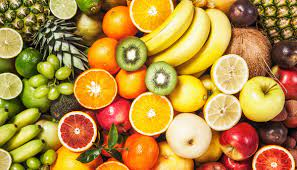
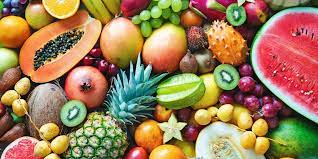
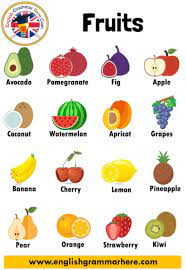
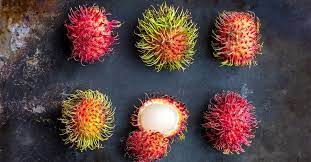
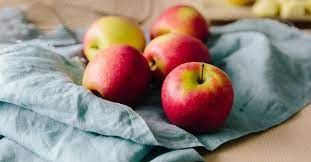
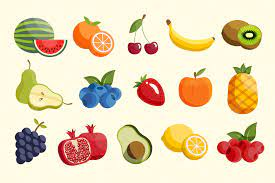
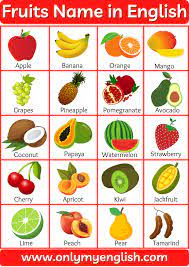
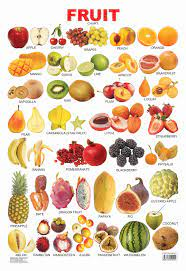
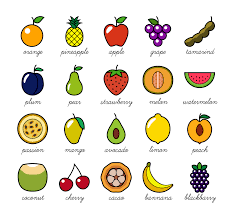
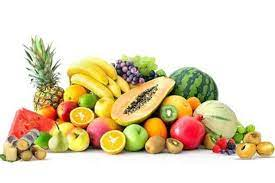

In [39]:
fruits

In [40]:
len(fruits)

10

In [5]:
cars=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
cars.send_keys('cars')

In [6]:
search2=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div')
search2.click()

In [7]:
car=[]
car_tab=driver.find_elements(By.XPATH,'//div[@class=" bRMDJf islir"]/img')
for i in car_tab[0:10]:
    car.append(i.get_attribute('src'))

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
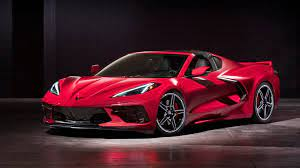
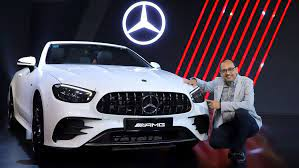
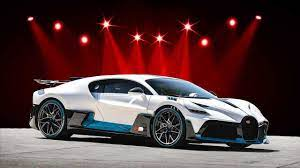
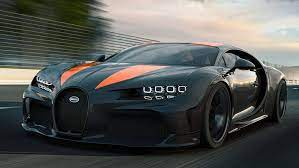
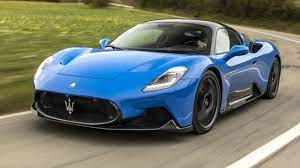
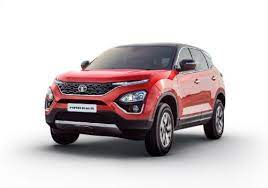
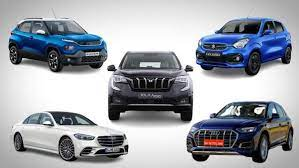
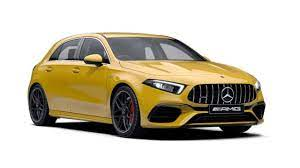
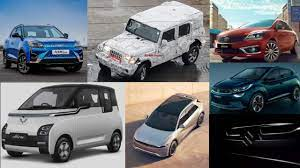
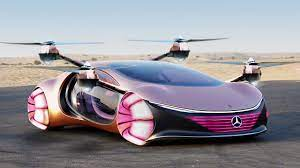

In [8]:
car

In [9]:
len(car)

10

In [14]:
ML=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
ML.send_keys('Machine learning')

In [16]:
search3=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div')
search3.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
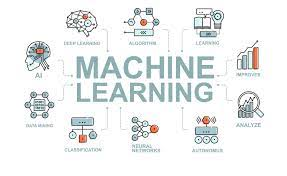
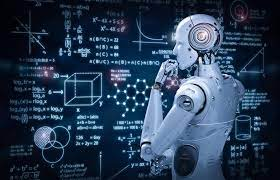
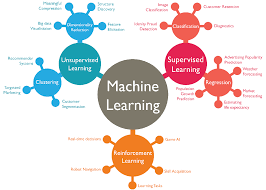
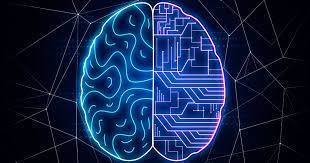
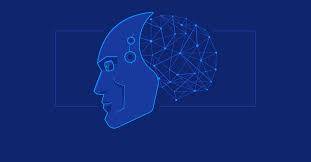
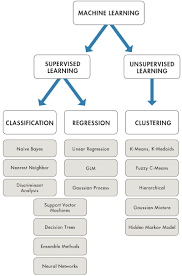
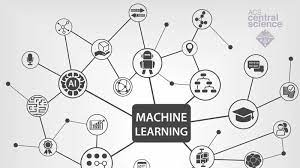
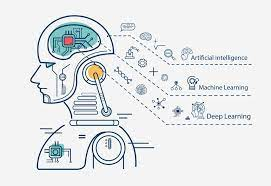
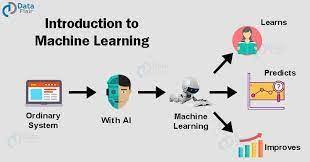
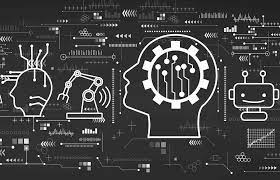

In [20]:
machine_learning=[]
ML_tab=driver.find_elements(By.XPATH,'//div[@class=" bRMDJf islir"]/img')
for i in ML_tab[0:10]:
    machine_learning.append(i.get_attribute('src'))
    
machine_learning

In [26]:
guitar=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
guitar.send_keys('guitars')

In [27]:
search4=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div')
search4.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
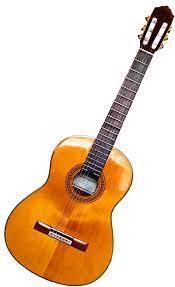
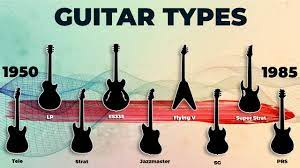
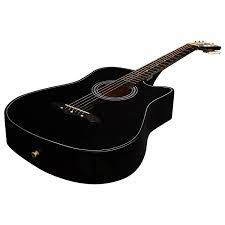
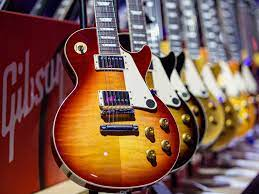
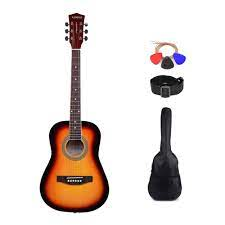
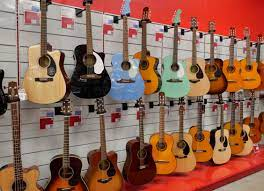
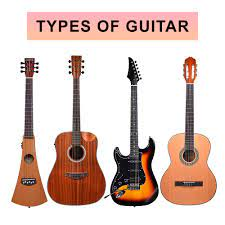
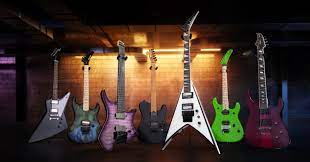
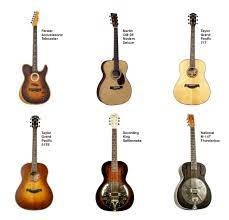
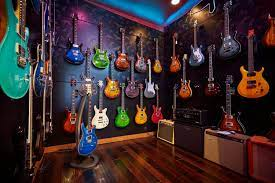

In [29]:
guitars=[]
guitar_tab=driver.find_elements(By.XPATH,'//div[@class=" bRMDJf islir"]/img')
for i in guitar_tab[0:10]:
    guitars.append(i.get_attribute('src'))
    
guitars

In [42]:
df3=pd.DataFrame({'fruits':fruits,'cars':car,'ml':machine_learning,'giutar':guitars})
df3

,fruits,cars,ml,giutar
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


# Question 4:- Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) 
on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be 
scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, 
“Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the 
details is missing then replace it by “- “. Save your results in a dataframe and CSV

In [307]:
driver.get(r'https://www.flipkart.com/')

In [308]:
phone=driver.find_element(By.XPATH,'//html/body/div/div/div[1]/div[1]/div[2]/div[2]/form/div/div/input')
phone.send_keys('smartphones')

In [309]:
search=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/button')
search.click()

In [310]:
product_url=[]
url=driver.find_elements(By.XPATH,'//a[@class="_1fQZEK"]')
for i in url[0:10]:
    product_url.append(i.get_attribute('href'))
    
product_url

['https://www.flipkart.com/motorola-g32-satin-silver-128-gb/p/itm8e7224d29bfc6?pid=MOBGM2EHGUNGDDQR&lid=LSTMOBGM2EHGUNGDDQRKIBLDP&marketplace=FLIPKART&q=smartphones&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=organic&iid=9ace169e-3b82-40ea-b4ab-95d758aa5e67.MOBGM2EHGUNGDDQR.SEARCH&ppt=hp&ppn=homepage&ssid=enxikbronk0000001684335610350&qH=6ea4465d0add4685',
 'https://www.flipkart.com/vivo-t2x-5g-marine-blue-128-gb/p/itmcf0e8d553142a?pid=MOBGZBFUZHRYUKVR&lid=LSTMOBGZBFUZHRYUKVRIAHQ7J&marketplace=FLIPKART&q=smartphones&store=tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=organic&iid=9ace169e-3b82-40ea-b4ab-95d758aa5e67.MOBGZBFUZHRYUKVR.SEARCH&ppt=hp&ppn=homepage&ssid=enxikbronk0000001684335610350&qH=6ea4465d0add4685',
 'https://www.flipkart.com/vivo-t2x-5g-aurora-gold-128-gb/p/itmcf0e8d553142a?pid=MOBGZBFUSEFSWASX&lid=LSTMOBGZBFUSEFSWASXKM9M4E&marketplace=FLIPKART&q=smartphones&store=tyy%2F4io&srno=s_1_3&otracker=search&otracker1=search&fm=organic&iid=9ace169e

In [311]:
len(product_url)

10

In [312]:
barnd_name=[]
smart_phone_name=[]
color=[]
memory=[]
display_size=[]
camera=[]
battery_cap=[]

In [313]:
for i in product_url:
    driver.get(i)
    try:
        brand_name_tag=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[1]/div[1]/div/div[4]/a')
        barnd_name.append(brand_name_tag.text)
        
        dispaly_size_tag=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[8]/div[1]/div/div[2]/ul/li[2]')
        display_size.append(dispaly_size_tag.text)
        
        color_tag=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[6]/div/div[1]/div[1]/div/ul')
        color.append(color_tag.text)
        
        memory_tag=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[8]/div[1]/div/div[2]/ul/li[1]')
        memory.append(memory_tag.text)
        
        camera_tag=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[8]/div[1]/div/div[2]/ul/li[3]')
        camera.append(camera_tag.text)
        
        battery_cap_tag=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[8]/div[1]/div/div[2]/ul/li[4]')
        battery_cap.append(battery_cap_tag.text)
        
        phone_tag=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[2]/div/div[1]/h1/span')
        smart_phone_name.append(phone_tag.text)
    except:
        barnd_name.append('-')
        display_size.append('-')
        color.append('-')
        memeory.append('-')
        camera.append('-')
        battery_cap.append('-')
        smart_phone_name.append('-')

In [314]:
display_size

['16.64 cm (6.55 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.51 cm (6.5 inch) HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.51 cm (6.5 inch) HD+ Display',
 '16.51 cm (6.5 inch) HD+ Display']

In [315]:
barnd_name

['MOTOROLA Mobiles',
 'vivo Mobiles',
 'vivo Mobiles',
 'vivo Mobiles',
 'realme Mobiles',
 'vivo Mobiles',
 'vivo Mobiles',
 'vivo Mobiles',
 'realme Mobiles',
 'realme Mobiles']

In [321]:
memory

['8 GB RAM | 128 GB ROM',
 '8 GB RAM | 128 GB ROM',
 '8 GB RAM | 128 GB ROM',
 '8 GB RAM | 128 GB ROM',
 '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
 '6 GB RAM | 128 GB ROM',
 '4 GB RAM | 128 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB']

In [322]:
smart_phone_name

['MOTOROLA G32 (Satin Silver, 128 GB)  (8 GB RAM)',
 'vivo T2x 5G (Marine Blue, 128 GB)  (8 GB RAM)',
 'vivo T2x 5G (Aurora Gold, 128 GB)  (8 GB RAM)',
 'vivo T2x 5G (Glimmer Black, 128 GB)  (8 GB RAM)',
 'realme C33 2023 (Aqua Blue, 64 GB)  (4 GB RAM)',
 'vivo T2x 5G (Glimmer Black, 128 GB)  (6 GB RAM)',
 'vivo T2x 5G (Marine Blue, 128 GB)  (4 GB RAM)',
 'vivo T2x 5G (Aurora Gold, 128 GB)  (6 GB RAM)',
 'realme C33 2023 (Night Sea, 64 GB)  (4 GB RAM)',
 'realme C33 2023 (Sandy Gold, 64 GB)  (4 GB RAM)']

In [323]:
battery_cap

['5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Lithium Ion Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Lithium Ion Battery',
 '5000 mAh Lithium Ion Battery']

In [324]:
display_size

['16.64 cm (6.55 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.51 cm (6.5 inch) HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.51 cm (6.5 inch) HD+ Display',
 '16.51 cm (6.5 inch) HD+ Display']

In [325]:
color

['', '', '', '', '', '', '', '', '', '']

In [327]:
df4=pd.DataFrame({'smart_phone_name':smart_phone_name,'dispaly_size':display_size,'color':color,'brand_name':barnd_name,'battery_capacity':battery_cap,'memory':memory})

In [328]:
df4

,smart_phone_name,dispaly_size,color,brand_name,battery_capacity,memory
0,"MOTOROLA G32 (Satin Silver, 128 GB) (8 GB RAM)",16.64 cm (6.55 inch) Full HD+ Display,,MOTOROLA Mobiles,5000 mAh Battery,8 GB RAM | 128 GB ROM
1,"vivo T2x 5G (Marine Blue, 128 GB) (8 GB RAM)",16.71 cm (6.58 inch) Full HD+ Display,,vivo Mobiles,5000 mAh Battery,8 GB RAM | 128 GB ROM
2,"vivo T2x 5G (Aurora Gold, 128 GB) (8 GB RAM)",16.71 cm (6.58 inch) Full HD+ Display,,vivo Mobiles,5000 mAh Battery,8 GB RAM | 128 GB ROM
3,"vivo T2x 5G (Glimmer Black, 128 GB) (8 GB RAM)",16.71 cm (6.58 inch) Full HD+ Display,,vivo Mobiles,5000 mAh Battery,8 GB RAM | 128 GB ROM
4,"realme C33 2023 (Aqua Blue, 64 GB) (4 GB RAM)",16.51 cm (6.5 inch) HD+ Display,,realme Mobiles,5000 mAh Lithium Ion Battery,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB
5,"vivo T2x 5G (Glimmer Black, 128 GB) (6 GB RAM)",16.71 cm (6.58 inch) Full HD+ Display,,vivo Mobiles,5000 mAh Battery,6 GB RAM | 128 GB ROM
6,"vivo T2x 5G (Marine Blue, 128 GB) (4 GB RAM)",16.71 cm (6.58 inch) Full HD+ Display,,vivo Mobiles,5000 mAh Battery,4 GB RAM | 128 GB ROM
7,"vivo T2x 5G (Aurora Gold, 128 GB) (6 GB RAM)",16.71 cm (6.58 inch) Full HD+ Display,,vivo Mobiles,5000 mAh Battery,6 GB RAM | 128 GB ROM
8,"realme C33 2023 (Night Sea, 64 GB) (4 GB RAM)",16.51 cm (6.5 inch) HD+ Display,,realme Mobiles,5000 mAh Lithium Ion Battery,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB
9,"realme C33 2023 (Sandy Gold, 64 GB) (4 GB RAM)",16.51 cm (6.5 inch) HD+ Display,,realme Mobiles,5000 mAh Lithium Ion Battery,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB


# Question 5:-  Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [190]:
driver.get(r'https://www.google.co.in/maps/@22.4158825,71.3269721,7z')

In [191]:
search=input('enter the name of city want to search lat_long:- ')

enter the name of city want to search lat_long:- manila


In [195]:
city_search=driver.find_element(By.XPATH,'/html/body/div[3]/div[9]/div[3]/div[1]/div[1]/div[1]/div[2]/form/div[2]/div[3]/div/input[1]')
city_search.send_keys(search)

In [196]:
find1=driver.find_element(By.XPATH,'/html/body/div[3]/div[9]/div[3]/div[1]/div[1]/div[1]/div[2]/div[1]/button')
find1.click()

In [225]:
 url_string=[]
x=[]
try:
    url_string.append(driver.current_url)
    print(url_string)
    lat_long=re.findall(r'@(.*)data',url_string)
    x.append(lat_long.split)
    
except:
    url_string.append('not found')
        

['https://www.google.co.in/maps/place/Manila,+Metro+Manila,+Philippines/@14.5964983,120.9795598,12z/data=!3m1!4b1!4m6!3m5!1s0x3397ca03571ec38b:0x69d1d5751069c11f!8m2!3d14.5995124!4d120.9842195!16zL20vMDE5NXBk']


In [228]:
!pip install geopy

Defaulting to user installation because normal site-packages is not writeable


In [229]:
!pip install geocoder

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [232]:
from geopy.geocoders import Nominatim
Nomi_locator = Nominatim(user_agent="My App")
address= search
location = Nomi_locator.geocode(address)

print("You find for the location:", location)
print(f"The Latitude of {location} is: <{location.latitude}>")
print(f"The Longitude of {location} is: <{location.longitude}>")

You find for the location: Manila, Capital District, Metro Manila, Philippines
The Latitude of Manila, Capital District, Metro Manila, Philippines is: <14.5948914>
The Longitude of Manila, Capital District, Metro Manila, Philippines is: <120.9782618>


# Question 8:-Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be 
scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [20]:
driver.get(r'https://www.forbes.com/billionaires/')

In [54]:
rank=[]
name=[]
source=[]
industry=[]
age=[]
net_worth=[]
citizenship=[]

In [55]:
rank_tag=driver.find_elements(By.XPATH,'//div[@class="Table_rank___YBhk Table_dataCell__2QCve"]')
for i in rank_tag:
    rank.append(i.text)
    
name_tag=driver.find_elements(By.XPATH,'//div[@class="TableRow_row__L-0Km"]/div[2]/div[1]')
for i in name_tag:
    name.append(i.text)
    
source_tag=driver.find_elements(By.XPATH,'//div[@class="TableRow_rowContainer__IC1Tv"]/div/div[2]/div/div/div[6]')
for i in source_tag:
    source.append(i.text)
    
industry_tag=driver.find_elements(By.XPATH,'//div[@class="TableRow_rowContainer__IC1Tv"]/div[1]/div[2]/div/div/div[7]')
for i in industry_tag:
    industry.append(i.text)
    
age_tag=driver.find_elements(By.XPATH,'//div[@class="TableRow_row__L-0Km"]/div[4]')
for i in age_tag:
    age.append(i.text)
    
net_worth_tag=driver.find_elements(By.XPATH,'//div[@class="TableRow_row__L-0Km"]/div[3]/div[1]')
for i in net_worth_tag:
    net_worth.append(i.text)
    
citizenship_tag=driver.find_elements(By.XPATH,'//div[@class="TableRow_row__L-0Km"]/div[5]')
for i in citizenship_tag:
    citizenship.append(i.text)

In [56]:
ranks

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '17',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '31',
 '33',
 '34',
 '35',
 '35',
 '37',
 '38',
 '39',
 '40',
 '41',
 '41',
 '43',
 '43',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '65',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '72',
 '74',
 '74',
 '76',
 '77',
 '77',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '84',
 '86',
 '86',
 '88',
 '89',
 '89',
 '89',
 '92',
 '93',
 '94',
 '94',
 '94',
 '97',
 '97',
 '99',
 '100',
 '101',
 '101',
 '103',
 '104',
 '104',
 '106',
 '107',
 '108',
 '108',
 '108',
 '108',
 '112',
 '113',
 '114',
 '115',
 '116',
 '116',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '124',
 '126',
 '127',
 '128',
 '128',
 '130',
 '130',
 '130',
 '133',
 '133',
 '133',
 '136',
 '137',
 '138',
 '13

In [70]:
len(ranks)

199

In [71]:
names=name[0:199]
names

['Bernard Arnault & family',
 'Elon Musk',
 'Jeff Bezos',
 'Larry Ellison',
 'Warren Buffett',
 'Bill Gates',
 'Michael Bloomberg',
 'Carlos Slim Helu & family',
 'Mukesh Ambani',
 'Steve Ballmer',
 'Francoise Bettencourt Meyers & family',
 'Larry Page',
 'Amancio Ortega',
 'Sergey Brin',
 'Zhong Shanshan',
 'Mark Zuckerberg',
 'Charles Koch',
 'Julia Koch & family',
 'Jim Walton',
 'Rob Walton',
 'Alice Walton',
 'David Thomson & family',
 'Michael Dell',
 'Gautam Adani',
 'Phil Knight & family',
 'Zhang Yiming',
 'Dieter Schwarz',
 'François Pinault & family',
 'Klaus-Michael Kuehne',
 'Giovanni Ferrero',
 'Jacqueline Mars',
 'John Mars',
 'Li Ka-shing',
 'Ma Huateng',
 'Miriam Adelson & family',
 'Ken Griffin',
 'Mark Mateschitz',
 'Robin Zeng',
 'Tadashi Yanai & family',
 'Len Blavatnik',
 'Alain Wertheimer',
 'Gerard Wertheimer',
 'Gianluigi Aponte',
 'Rafaela Aponte-Diamant',
 'Colin Zheng Huang',
 'Reinhold Wuerth & family',
 'Lee Shau Kee',
 'Jeff Yass',
 'Jim Simons',
 'Stephe

In [73]:
len(names)

199

In [75]:
industrys=industry[0:199]
industrys

['Fashion & Retail',
 'Automotive',
 'Technology',
 'Technology',
 'Finance & Investments',
 'Technology',
 'Media & Entertainment',
 'Telecom',
 'Diversified',
 'Technology',
 'Fashion & Retail',
 'Technology',
 'Fashion & Retail',
 'Technology',
 'Food & Beverage',
 'Technology',
 'Diversified',
 'Diversified',
 'Fashion & Retail',
 'Fashion & Retail',
 'Fashion & Retail',
 'Media & Entertainment',
 'Technology',
 'Diversified',
 'Fashion & Retail',
 'Technology',
 'Fashion & Retail',
 'Fashion & Retail',
 'Logistics',
 'Food & Beverage',
 'Food & Beverage',
 'Food & Beverage',
 'Diversified',
 'Technology',
 'Gambling & Casinos',
 'Finance & Investments',
 'Food & Beverage',
 'Automotive',
 'Fashion & Retail',
 'Diversified',
 'Fashion & Retail',
 'Fashion & Retail',
 'Logistics',
 'Logistics',
 'Technology',
 'Manufacturing',
 'Real Estate',
 'Finance & Investments',
 'Finance & Investments',
 'Finance & Investments',
 'Automotive',
 'Metals & Mining',
 'Technology',
 'Metals & Min

In [76]:
len(industrys)

199

In [77]:
ages=age[0:199]
ages

['74',
 '51',
 '59',
 '78',
 '92',
 '67',
 '81',
 '83',
 '65',
 '67',
 '69',
 '50',
 '87',
 '49',
 '68',
 '38',
 '87',
 '60',
 '74',
 '78',
 '73',
 '65',
 '58',
 '60',
 '85',
 '39',
 '83',
 '86',
 '85',
 '58',
 '83',
 '87',
 '94',
 '51',
 '77',
 '54',
 '30',
 '54',
 '74',
 '65',
 '74',
 '72',
 '82',
 '78',
 '43',
 '87',
 '95',
 '64',
 '84',
 '76',
 '60',
 '69',
 '51',
 '69',
 '77',
 '74',
 '78',
 '51',
 '56',
 '52',
 '82',
 '62',
 '58',
 '80',
 '80',
 '83',
 '70',
 '81',
 '65',
 '66',
 '52',
 '61',
 '67',
 '36',
 '52',
 '60',
 '90',
 '77',
 '57',
 '72',
 '84',
 '61',
 '73',
 '59',
 '55',
 '72',
 '57',
 '57',
 '77',
 '65',
 '70',
 '61',
 '72',
 '66',
 '87',
 '73',
 '90',
 '83',
 '92',
 '70',
 '72',
 '55',
 '72',
 '75',
 '67',
 '55',
 '67',
 'N/A',
 'N/A',
 '83',
 '76',
 '67',
 '45',
 '68',
 '56',
 '83',
 '81',
 '78',
 '68',
 '56',
 '59',
 '69',
 '95',
 '55',
 '65',
 '93',
 '67',
 '57',
 '94',
 '78',
 '76',
 '47',
 '80',
 '80',
 '71',
 '60',
 '90',
 '64',
 '75',
 '58',
 '57',
 '50',
 '69

In [78]:
len(ages)

199

In [79]:
sources=source[0:199]
sources

['',
 'Tesla, SpaceX',
 'Amazon',
 'Oracle',
 'Berkshire Hathaway',
 'Microsoft',
 'Bloomberg LP',
 'Telecom',
 'Diversified',
 'Microsoft',
 "L'Oréal",
 'Google',
 'Zara',
 'Google',
 'Beverages, pharmaceuticals',
 'Facebook',
 'Koch Industries',
 'Koch Industries',
 'Walmart',
 'Walmart',
 'Walmart',
 'Media',
 'Dell Technologies',
 'Infrastructure, commodities',
 'Nike',
 'TikTok',
 'Retail',
 'Luxury goods',
 'Shipping',
 'Nutella, chocolates',
 'Candy, pet food',
 'Candy, pet food',
 'Diversified',
 'Internet media',
 'Casinos',
 'Hedge funds',
 'Red Bull',
 'Batteries',
 'Fashion retail',
 'Music, chemicals',
 'Chanel',
 'Chanel',
 'Shipping',
 'Shipping',
 'E-commerce',
 'Fasteners',
 'Real estate',
 'Trading, investments',
 'Hedge funds',
 'Investments',
 'BMW, pharmaceuticals',
 'Mining',
 'Online games',
 'Mining',
 'Software services',
 'Coal',
 'Discount brokerage',
 'Fertilizers, coal',
 'BMW',
 'Amazon',
 'Banking, tobacco',
 'Metals',
 'E-commerce',
 'Home appliances',
 

In [80]:
len(sources)

199

In [82]:
net_worths=net_worth[0:199]
net_worths

['$211 B',
 '$180 B',
 '$114 B',
 '$107 B',
 '$106 B',
 '$104 B',
 '$94.5 B',
 '$93 B',
 '$83.4 B',
 '$80.7 B',
 '$80.5 B',
 '$79.2 B',
 '$77.3 B',
 '$76 B',
 '$68 B',
 '$64.4 B',
 '$59 B',
 '$59 B',
 '$58.8 B',
 '$57.6 B',
 '$56.7 B',
 '$54.4 B',
 '$50.1 B',
 '$47.2 B',
 '$45.1 B',
 '$45 B',
 '$42.9 B',
 '$40.1 B',
 '$39.1 B',
 '$38.9 B',
 '$38.3 B',
 '$38.3 B',
 '$38 B',
 '$35.3 B',
 '$35 B',
 '$35 B',
 '$34.7 B',
 '$33.4 B',
 '$32.6 B',
 '$32.1 B',
 '$31.6 B',
 '$31.6 B',
 '$31.2 B',
 '$31.2 B',
 '$30.2 B',
 '$29.7 B',
 '$29.5 B',
 '$28.5 B',
 '$28.1 B',
 '$27.8 B',
 '$27.4 B',
 '$27 B',
 '$26.7 B',
 '$26.6 B',
 '$25.6 B',
 '$25.5 B',
 '$25.3 B',
 '$25.2 B',
 '$24.6 B',
 '$24.4 B',
 '$24.2 B',
 '$23.7 B',
 '$23.5 B',
 '$23.4 B',
 '$23.1 B',
 '$23.1 B',
 '$22.9 B',
 '$22.6 B',
 '$22.4 B',
 '$22.1 B',
 '$22 B',
 '$21.6 B',
 '$21.6 B',
 '$21.2 B',
 '$21.2 B',
 '$21.1 B',
 '$21 B',
 '$21 B',
 '$20.9 B',
 '$20.5 B',
 '$20.2 B',
 '$19.6 B',
 '$19.1 B',
 '$19 B',
 '$19 B',
 '$18.9 B',
 '$1

In [84]:
len(net_worths)

199

In [85]:
citizenships=citizenship[0:199]
citizenships

['France',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'Mexico',
 'India',
 'United States',
 'France',
 'United States',
 'Spain',
 'United States',
 'China',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'Canada',
 'United States',
 'India',
 'United States',
 'China',
 'Germany',
 'France',
 'Germany',
 'Italy',
 'United States',
 'United States',
 'Hong Kong',
 'China',
 'United States',
 'United States',
 'Austria',
 'Hong Kong',
 'Japan',
 'United States',
 'France',
 'France',
 'Switzerland',
 'Switzerland',
 'China',
 'Germany',
 'Hong Kong',
 'United States',
 'United States',
 'United States',
 'Germany',
 'Australia',
 'China',
 'Mexico',
 'India',
 'Indonesia',
 'United States',
 'Russia',
 'Germany',
 'United States',
 'Indonesia',
 'Russia',
 'China',
 'China',
 'Chile',
 'Indonesia',
 'United Kingdom',
 'India',
 'Japan',
 'Russia',
 'France',
 

In [86]:
len(citizenships)

199

In [90]:
df7=pd.DataFrame({'rank':ranks,'name':names,'ages':ages,'industry':industrys,'source':sources,'citizenship':citizenships,'net_worth':net_worths})
df7

,rank,name,ages,industry,source,citizenship,net_worth
0,1,Bernard Arnault & family,74,Fashion & Retail,,France,$211 B
1,2,Elon Musk,51,Automotive,"Tesla, SpaceX",United States,$180 B
2,3,Jeff Bezos,59,Technology,Amazon,United States,$114 B
3,4,Larry Ellison,78,Technology,Oracle,United States,$107 B
4,5,Warren Buffett,92,Finance & Investments,Berkshire Hathaway,United States,$106 B
...,...,...,...,...,...,...,...
194,195,Rick Cohen & family,70,Technology,Warehouse automation,United States,$9.6 B
195,195,Jin Baofang,70,Energy,Solar panels,China,$9.6 B
196,195,Luo Liguo & family,67,Manufacturing,Chemicals,China,$9.6 B
197,195,Marijke Mars,58,Food & Beverage,"Candy, pet food",United States,$9.6 B


# Question 6 :- Write a program to scrap details of all the funding deals for second quarter (i.e Jan 21 – March 21) from trak.in.

In [49]:
driver.get(r'https://trak.in/india-startup-funding-investment-2015/')

In [50]:
date=[]
startup_name=[]
work=[]
location=[]
investor_name=[]
amount=[]
investment_type=[]
industry=[]

In [51]:
date_tag=driver.find_elements(By.XPATH,'//div[@class="dataTables_scrollBody"]/table/tbody/tr/td[2]')
for i in date_tag:
    date.append(i.text)
    
startup_name_tag=driver.find_elements(By.XPATH,'//div[@class="dataTables_scrollBody"]/table/tbody/tr/td[3]')
for i in startup_name_tag:
    startup_name.append(i.text)
    
work_tag=driver.find_elements(By.XPATH,'//div[@class="dataTables_scrollBody"]/table/tbody/tr/td[5]')
for i in work_tag:
    work.append(i.text)
    
location_tag=driver.find_elements(By.XPATH,'//div[@class="dataTables_scrollBody"]/table/tbody/tr/td[6]')
for i in location_tag:
    location.append(i.text)
    
investor_name_tag=driver.find_elements(By.XPATH,'//div[@class="dataTables_scrollBody"]/table/tbody/tr/td[7]')
for i in investor_name_tag:
    investor_name.append(i.text)
    
amount_tag=driver.find_elements(By.XPATH,'//div[@class="dataTables_scrollBody"]/table/tbody/tr/td[9]')
for i in amount_tag:
    amount.append(i.text)
    
investment_tag=driver.find_elements(By.XPATH,'//div[@class="dataTables_scrollBody"]/table/tbody/tr/td[8]')
for i in investment_tag:
    investment_type.append(i.text)
    
industry_tag=driver.find_elements(By.XPATH,'//div[@class="dataTables_scrollBody"]/table/tbody/tr/td[4]')
for i in industry_tag:
    industry.append(i.text)
    

In [71]:
dates=date[0:30]
dates

['01/04/2021',
 '05/04/2021',
 '14/04/2021',
 '07/04/2021',
 '14/04/2021',
 '04/03/2021',
 '31/03/2021',
 '30/03/2021',
 '30/03/2021',
 '23/03/2021',
 '25/03/2021',
 '26/03/2021',
 '11/02/2021',
 '22/02/2021',
 '19/02/2021',
 '17/02/2021',
 '15/02/2021',
 '12/02/2021',
 '12/02/2021',
 '09/02/2021',
 '09/02/2021',
 '15/01/2021',
 '28/01/2021',
 '19/01/2021',
 '19/01/2021',
 '18/01/2021',
 '18/01/2021',
 '11/01/2021',
 '13/01/2021',
 '15/12/2020']

In [70]:
amounts=amount[0:30]
amounts

['460,000,000',
 '300,000,000',
 '343,000,000',
 '83,000,000',
 '7,400,000',
 '250,000,000',
 '140,000,000',
 '8,000,000',
 '460,000,000',
 '300,000,000',
 '11,000,000',
 '27,500,000',
 '2,500,000',
 '250,000,000',
 '2,747,045.20',
 '1,50,00,000',
 '75,000,000',
 '4,773,958',
 '55,000,000',
 '15,000,000',
 '18,000,000',
 '1,80,00,000',
 '6,172,258.50',
 '30,000,000',
 '15,000,000',
 '16,000,000',
 '15,000,000',
 '100,000,000',
 '4,000,000',
 '1,273,634.07']

In [69]:
locations=location[0:30]
locations

['Bengaluru',
 'Bengaluru',
 'Bengaluru',
 'Bengaluru',
 'Mumbai',
 'Jaipur, Rajasthan',
 'Palo Alto',
 'Bengaluru',
 'Bengaluru',
 'Bengaluru',
 'Gurgaon',
 'Gurgaon',
 'Gurgaon',
 'Gurgaon',
 'Mumbai',
 'Mumbai',
 'Bengaluru',
 'Mumbai',
 'Gurgaon',
 'London',
 'Gurgaon',
 'Bengaluru',
 'New Delhi',
 'Patna',
 'Mumbai',
 'Bengaluru',
 'Gurgaon',
 'Pune',
 'Bengaluru',
 'New Delhi']

In [68]:
works=work[0:30]
works

['Online tutoring',
 'Online reselling platform',
 'Online Food Delivery',
 'Investment platform',
 'Global B2B marketplace',
 'Online shopping platform',
 'Conversational Service Automation (CSA)',
 'Hyper-local delivery app',
 'Online tutoring',
 'Career and job-oriented upskilling.',
 'Social ecommerce and online grocery platform',
 'Commerce and payments platform to offline enterprise businesses.',
 'E-Learning Platform',
 'Online Food Delivery Platform',
 'Semi-cooked food delivery app',
 'Global Neobank Venture',
 'Digital lending platform',
 'Multi-brand furniture brand',
 'Online supermarket',
 'Consumer Technology Venture',
 'Game-based learning programme',
 'Insurance Services',
 'Shave care, beard care, and skincare products',
 'online marketplace for farm products and services',
 'HR Tech',
 'AI-powered telemedicine mobile app',
 'Online learning platform for kids in class 1-5',
 'Whole Food plant based Nashta',
 'Pharmacies',
 'Craft Beer']

In [64]:
investment_types=investment_type[0:30]
investment_types

['Series F',
 'Series E',
 'Series J',
 'Series D',
 'Venture',
 'Debt Financing',
 'Series D',
 'Series E',
 'Series F',
 'Seed',
 'Series A',
 'Series A',
 'Series B',
 'Venture',
 'Series C',
 'Seed',
 'Series C',
 'Debt Financing',
 'Unspecified',
 'Series A',
 'Series C',
 'Venture',
 'Venture',
 'Series C',
 'Seed',
 'Venture Round',
 'Seed Funding',
 'Series',
 'Seed',
 'Funding']

In [65]:
investors_name=investor_name[0:30]
investors_name

['Innoven Capital',
 'SoftBank Vision Fund 2',
 'Amansa Holdings, Carmignac, Falcon Edge Capital, Goldman Sachs, Think Investments',
 'MC Global Edtech, B Capital, Baron, others',
 'Hindustan Media Ventures',
 'Innoven Capital',
 'Sorenson Capital Partners',
 'Krishtal Advisors Pte Ltd',
 'MC Global Edtech, B Capital, Baron, others',
 'Titan Capital, others',
 'Accel Partners',
 'PayU',
 'SIG Global, Sequoia Capital, WaterBridge Ventures and ON Mauritius',
 'Tiger Global, Kora',
 'Rhodium Trust, Accel Partners and Swiggy',
 'Accel Partners and Lightspeed Venture Partners',
 'Azim Premji’s PremjiInvest and South Korea’s Mirae Asset Venture',
 'InnoVen Capital',
 'SoftBank Vision Fund (SVF)',
 'GV',
 'Owl Ventures',
 'A91 Partners, Faering Capital, TVS Capital Funds',
 'Reckitt Benckiser',
 'Prosus Ventures',
 'Salesforce Ventures',
 'Heritas Capital Management',
 'Sequoia Capital',
 'SIDBI Venture Capital',
 'Matrix Partners India, RTP Global, others',
 'Nishant Mittal, Pankaj Chaddah a

In [66]:
industrys=industry[0:30]
industrys

['Edu-tech',
 'E-commerce',
 'Online Food Delivery',
 'FinTech',
 'E-commerce',
 'E-commerce',
 'Technology',
 'E-commerce',
 'Edu-tech',
 'Edu-tech',
 'E-commerce',
 'FinTech',
 'Edu Tech',
 'Hospitality',
 'Hospitality',
 'FinTech',
 'Finance',
 'E-commerce',
 'E-Commerce',
 'Technology',
 'EdTech',
 'Financial Services',
 'Consumer Goods Company',
 'AgriTech Startup',
 'SaaS',
 'Health Tech Startup',
 'EdTech',
 'Food Startup',
 'B2B E-commerce',
 'Food and Beverage']

In [67]:
stratup_names=startup_name[0:30]
stratup_names

['BYJU’S',
 'Meesho',
 'Swiggy',
 'Groww',
 'Beldara',
 'DealShare',
 'Uniphore',
 'Dunzo',
 'BYJU’S',
 'SkilloVilla',
 'CityMall',
 'DotPe',
 'Doubtnut',
 'Zomato',
 'Fingerlix',
 'Zolve',
 'KreditBee',
 'Pepperfry',
 'Grofers',
 'Nothing',
 'SplashLearn',
 'Digit Insurance',
 'Bombay Shaving Company',
 'DeHaat',
 'Darwinbox',
 'mfine',
 'Udayy',
 'True Elements',
 'Saveo',
 'Bira 91']

In [75]:
df6=pd.DataFrame({'date':dates,'startup_names':stratup_names,'industry':industrys,'work':works,'investment':investment_types,'amount':amounts,'investor_name':investors_name,'loaction':locations})
df6

,date,startup_names,industry,work,investment,amount,investor_name,loaction
0,01/04/2021,BYJU’S,Edu-tech,Online tutoring,Series F,"460,000,000",Innoven Capital,Bengaluru
1,05/04/2021,Meesho,E-commerce,Online reselling platform,Series E,"300,000,000",SoftBank Vision Fund 2,Bengaluru
2,14/04/2021,Swiggy,Online Food Delivery,Online Food Delivery,Series J,"343,000,000","Amansa Holdings, Carmignac, Falcon Edge Capita...",Bengaluru
3,07/04/2021,Groww,FinTech,Investment platform,Series D,"83,000,000","MC Global Edtech, B Capital, Baron, others",Bengaluru
4,14/04/2021,Beldara,E-commerce,Global B2B marketplace,Venture,"7,400,000",Hindustan Media Ventures,Mumbai
5,04/03/2021,DealShare,E-commerce,Online shopping platform,Debt Financing,"250,000,000",Innoven Capital,"Jaipur, Rajasthan"
6,31/03/2021,Uniphore,Technology,Conversational Service Automation (CSA),Series D,"140,000,000",Sorenson Capital Partners,Palo Alto
7,30/03/2021,Dunzo,E-commerce,Hyper-local delivery app,Series E,"8,000,000",Krishtal Advisors Pte Ltd,Bengaluru
8,30/03/2021,BYJU’S,Edu-tech,Online tutoring,Series F,"460,000,000","MC Global Edtech, B Capital, Baron, others",Bengaluru
9,23/03/2021,SkilloVilla,Edu-tech,Career and job-oriented upskilling.,Seed,"300,000,000","Titan Capital, others",Bengaluru


# Question 7:- Write a program to scrap all the available details of best gaming laptops from digit.in

In [4]:
driver.get(r'https://www.digit.in/top-products/best-gaming-laptops-40.html')

In [5]:
product_url=[]
url=driver.find_elements(By.XPATH,'//div[@class="prod_details_cont"]/div[2]/div/div/div/span[2]')
for i in url:
    product_url.append(i.get_attribute('data-href'))

In [6]:
product_url

['https://www.digit.in/laptops/hp-omen-17-ck2008tx-13th-gen-core-i7-13700hx-price-346659.html',
 'https://www.digit.in/laptops/msi-gt77-titan-12uhs-054in-12th-gen-core-i9-12900hx-2022-price-330036.html',
 'https://www.digit.in/laptops/lenovo-legion-5i-pro-12th-gen-core-i7-12700h-82rf00e1in-price-346668.html',
 'https://www.digit.in/laptops/asus-rog-strix-scar-18-price-344598.html',
 'https://www.digit.in/laptops/acer-predator-helios-neo-16-13th-gen-core-i7-13700hx-phn16-71-price-346677.html',
 'https://www.digit.in/laptops/asus-rog-zephyrus-g14-ryzen-9-6900hs-ga402rjz-l4136ws-price-346686.html',
 'https://www.digit.in/laptops/msi-cyborg-15-12th-gen-core-i7-12650h-a12vf-205in-price-346695.html']

In [7]:
product_name=[]
launch_date=[]
os=[]
RAM=[]
processor=[]
display_size=[]
processor_name=[]
weight=[]

In [8]:
for i in product_url:
    driver.get(i)
    time.sleep(1)
    try:
        product_name_tag=driver.find_element(By.XPATH,'/html/body/div[7]/div[2]/div[2]/h1')
        product_name.append(product_name_tag.text)
        
        launch_date_tag=driver.find_element(By.XPATH,'//div[@class="speci_details"]/div[1]/div[1]/table/tbody/tr[2]/td[3]')
        launch_date.append(launch_date_tag.text)
        
        os_tag=driver.find_element(By.XPATH,'//div[@class="speci_details"]/div[1]/div[1]/table/tbody/tr[3]/td[3]')
        os.append(os_tag.text)
        
        RAM_tag=driver.find_element(By.XPATH,'//div[@class="speci_details"]/div[1]/div[4]/table/tbody/tr[1]/td[3]')
        RAM.append(RAM_tag.text)
        
        processor_tag=driver.find_element(By.XPATH,'//div[@class="speci_details"]/div[1]/div[6]/table/tbody/tr[4]/td[3]')
        processor.append(processor_tag.text)
        
        display_size_tag=driver.find_element(By.XPATH,'//div[@class="speci_details"]/div[1]/div[2]/table/tbody/tr[2]/td[3]')
        display_size.append(display_size_tag.text)
        
        processor_name_tag=driver.find_element(By.XPATH,'//div[@class="speci_details"]/div[1]/div[6]/table/tbody/tr[1]/td[3]')
        processor_name.append(processor_name_tag.text)
        
        weight_tag=driver.find_element(By.XPATH,'//div[@class="speci_details"]/div[1]/div[5]/table/tbody/tr[1]/td[3]')
        weight.append(weight_tag.text)
        
        
    except:
        product_name.append('not present')
        
        launch_date.append('not_present')
        
        os.append('not present')
        
        RAM.append('not present')
        
        processor.append('not present')
        
        display_size.append('not present')
        
        processor_name.append('not present')
        
        weight.append('not present')
        

In [10]:
product_names=product_name[0:15:2]
product_names

['HP Omen 17-ck2008TX 13th Gen Core i7-13700HX',
 'MSI GT77 Titan 12UHS-054IN 12th Gen Core i9-12900HX',
 'Lenovo Legion 5i Pro 12th Gen Core i7-12700H (82RF00E1IN)',
 'ASUS ROG Strix Scar 18 G834JZ-N5041WS 13th Gen Core i9-13980HX',
 'Acer Predator Helios Neo 16 13th Gen Core i7-13700HX (PHN16-71)',
 'ASUS ROG Zephyrus G14 Ryzen 9-6900HS (GA402RJZ-L4136WS)',
 'MSI Cyborg 15 12th Gen Core i7-12650H (A12VF-205IN)']

In [11]:
launch_dates=launch_date[0:15:2]
launch_dates

['12-05-2023',
 '31-10-2022',
 '12-05-2023',
 '27-03-2023',
 '12-05-2023',
 '12-05-2023',
 '12-05-2023']

In [12]:
oss=os[0:15:2]
oss

['Windows 11 Home',
 'Windows 11 Home',
 'Windows 11 Home',
 'Windows 11 Home',
 'Windows 11 Home',
 'Windows 11 Home',
 'Windows 11 Home']

In [15]:
RAMs=RAM[0:15:2]
RAMs

['16 GB', '64 GB', '32 GB', '32 GB', '16 GB', '16 GB', '16 GB']

In [18]:
processors=processor[0:15:2]
processors

['NVIDIA GeForce RTX 4080',
 'NVIDIA GeForce RTX 3080Ti',
 'NVIDIA GeForce RTX 3070 Ti',
 'NVIDIA GeForce RTX 4080',
 '8 GB',
 'AMD Radeon RX 6700S',
 'NVIDIA GeForce RTX 4060']

In [20]:
weights=weight[0:15:2]
weights

['2.78', '3.3', '3.6', '3.1', '2.6', '1.65', '1.98']

In [21]:
display_sizes=display_size[0:15:2]
display_sizes

['17.3', '17.3', '16', '18', '16', '14', '15.6']

In [24]:
processor_names=processor_name[0:15:2]
processor_names

['13th Gen Intel Core i7-13700HX',
 '12th Gen Intel Core i9-12900HX',
 '12th Gen Intel Core i7-12700H',
 '13th Gen Intel Core i9-13980HX',
 '13th Gen Intel Core i7-13700HX',
 'AMD Ryzen 9-6900HS',
 '12th Gen Intel Core i7-12650H']

In [26]:
df8=pd.DataFrame({'product_names':product_names,'RAM':RAMs,'display_size':display_sizes,'procesoor_name':processor_names,'weight':weights,'os':oss,'processor':processors,'launch_dates':launch_dates})
df8

,product_names,RAM,display_size,procesoor_name,weight,os,processor,launch_dates
0,HP Omen 17-ck2008TX 13th Gen Core i7-13700HX,16 GB,17.3,13th Gen Intel Core i7-13700HX,2.78,Windows 11 Home,NVIDIA GeForce RTX 4080,12-05-2023
1,MSI GT77 Titan 12UHS-054IN 12th Gen Core i9-12...,64 GB,17.3,12th Gen Intel Core i9-12900HX,3.3,Windows 11 Home,NVIDIA GeForce RTX 3080Ti,31-10-2022
2,Lenovo Legion 5i Pro 12th Gen Core i7-12700H (...,32 GB,16,12th Gen Intel Core i7-12700H,3.6,Windows 11 Home,NVIDIA GeForce RTX 3070 Ti,12-05-2023
3,ASUS ROG Strix Scar 18 G834JZ-N5041WS 13th Gen...,32 GB,18,13th Gen Intel Core i9-13980HX,3.1,Windows 11 Home,NVIDIA GeForce RTX 4080,27-03-2023
4,Acer Predator Helios Neo 16 13th Gen Core i7-1...,16 GB,16,13th Gen Intel Core i7-13700HX,2.6,Windows 11 Home,8 GB,12-05-2023
5,ASUS ROG Zephyrus G14 Ryzen 9-6900HS (GA402RJZ...,16 GB,14,AMD Ryzen 9-6900HS,1.65,Windows 11 Home,AMD Radeon RX 6700S,12-05-2023
6,MSI Cyborg 15 12th Gen Core i7-12650H (A12VF-2...,16 GB,15.6,12th Gen Intel Core i7-12650H,1.98,Windows 11 Home,NVIDIA GeForce RTX 4060,12-05-2023


# Question 9:-Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video

In [4]:
driver.get(r'https://www.youtube.com/watch?v=x2CHXkeL8ho')

In [7]:
comment=[]
comment_tag=driver.find_elements(By.XPATH,'//div[@class="style-scope ytd-expander"]/yt-formatted-string')
for i in comment_tag:
    comment.append(i.text)

In [8]:
comment

[' Get 50% OFF on Kukufm’s 1st Month subscription!! \nOnly at Rs 49 instead of Rs 99  \n\nUse my code SGS50',
 'The only solution for avoiding this extinction is to listen to audio books as promoted by sir in the same video where he is telling that life will get extinct ',
 'जो भी आ रहा हो जल्दी आये!!',
 'Sir... You never disappoint us with the thumbnail..... I can bet on it  , we are not going to vanish from our planet.... Not yet..',
 'जितना डर अंतरिक्ष में नहीं उससे ज्यादा तो आपके video के thumnail में है',
 'Those who, by practising this knowledge have entered into my being, are not born again at the cosmic dawn, nor feel perturbed even during the cosmic dissolution. ',
 'NICE, THANKS SIR FOR SHARING ! GREAT JOB DONE BY YOU !',
 'We should be very happy for that!\nAll the problems will be solved!',
 "that's why our ancient literatures say that the  position/situations of stars & planets affect our life.",
 'Polution is more dangerous than possible exray explosion',
 'Sir,, \nhow de

In [9]:
len(comment)

440

In [10]:
comment_time=[]
comment_time_tag=driver.find_elements(By.XPATH,'//div[@class="style-scope ytd-comment-renderer"]/yt-formatted-string/a')
for i in comment_time_tag:
    comment_time.append(i.text)


In [11]:
comment_time

['3 weeks ago',
 '3 weeks ago',
 '3 weeks ago',
 '3 weeks ago',
 '3 weeks ago',
 '3 weeks ago',
 '2 weeks ago',
 '3 weeks ago',
 '2 weeks ago',
 '3 weeks ago',
 '3 weeks ago',
 '3 weeks ago',
 '3 weeks ago',
 '3 weeks ago',
 '3 weeks ago',
 '2 weeks ago',
 '3 weeks ago',
 '3 weeks ago',
 '3 weeks ago (edited)',
 '3 weeks ago',
 '3 weeks ago (edited)',
 '3 weeks ago',
 '2 weeks ago',
 '3 weeks ago',
 '3 weeks ago',
 '2 weeks ago',
 '2 weeks ago',
 '3 weeks ago',
 '3 weeks ago',
 '3 weeks ago',
 '3 weeks ago',
 '3 weeks ago',
 '3 weeks ago',
 '3 weeks ago',
 '2 weeks ago',
 '3 weeks ago',
 '3 weeks ago',
 '3 weeks ago',
 '2 weeks ago',
 '3 weeks ago',
 '2 weeks ago',
 '2 weeks ago',
 '3 weeks ago',
 '3 weeks ago',
 '3 weeks ago',
 '3 weeks ago',
 '3 weeks ago',
 '2 weeks ago',
 '3 weeks ago',
 '3 weeks ago',
 '3 weeks ago (edited)',
 '3 weeks ago',
 '2 weeks ago',
 '2 weeks ago',
 '3 weeks ago (edited)',
 '3 weeks ago',
 '3 weeks ago',
 '3 weeks ago',
 '3 weeks ago',
 '2 weeks ago',
 '3 

In [12]:
len(comment_time)

440

In [18]:
comment_upvote=[]
comment_upvote_tag=driver.find_elements(By.XPATH,'//div[@class="style-scope ytd-comment-action-buttons-renderer"]/span[2]')
for i in comment_upvote_tag:
    comment_upvote.append(i.text)

In [19]:
comment_upvote

['23',
 '156',
 '955',
 '40',
 '103',
 '13',
 '',
 '11',
 '',
 '30',
 '2',
 '5',
 '26',
 '6',
 '2',
 '',
 '63',
 '18',
 '3',
 '84',
 '47',
 '15',
 '',
 '98',
 '10',
 '',
 '1',
 '65',
 '1',
 '2',
 '32',
 '1',
 '',
 '4',
 '',
 '1',
 '16',
 '2',
 '',
 '4',
 '1',
 '',
 '',
 '5',
 '',
 '',
 '6',
 '',
 '6',
 '1',
 '2',
 '7',
 '',
 '',
 '54',
 '',
 '2',
 '11',
 '1',
 '',
 '9',
 '',
 '1',
 '10',
 '',
 '',
 '15',
 '',
 '',
 '17',
 '2',
 '',
 '',
 '',
 '28',
 '2',
 '1',
 '10',
 '',
 '',
 '3',
 '',
 '',
 '',
 '1',
 '7',
 '',
 '',
 '12',
 '1',
 '',
 '5',
 '',
 '',
 '3',
 '',
 '',
 '10',
 '',
 '',
 '4',
 '1',
 '1',
 '7',
 '',
 '',
 '1',
 '',
 '3',
 '',
 '1',
 '7',
 '2',
 '1',
 '3',
 '',
 '',
 '7',
 '',
 '',
 '',
 '3',
 '1',
 '1',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '1',
 '',
 '',
 '1',
 '1',
 '',
 '1',
 '2',
 '',
 '',
 '1',
 '',
 '',
 '',
 '',
 '',
 '',
 '2',
 '1',
 '',
 '',
 '',
 '',
 '1',
 '',
 '',
 '',
 '1',
 '',
 '',
 '',
 '1',
 '',
 '',
 '1',
 '',
 '1',
 '',
 '',
 '1',
 '1',
 '1',
 '',
 '1',
 

In [15]:
len(comment_upvote)

440

In [21]:
df9=pd.DataFrame({'comment':comment,'comment_time':comment_time,'comment_upvote':comment_upvote})
df9

,comment,comment_time,comment_upvote
0,Get 50% OFF on Kukufm’s 1st Month subscriptio...,3 weeks ago,23
1,The only solution for avoiding this extinction...,3 weeks ago,156
2,जो भी आ रहा हो जल्दी आये!!,3 weeks ago,955
3,Sir... You never disappoint us with the thumbn...,3 weeks ago,40
4,जितना डर अंतरिक्ष में नहीं उससे ज्यादा तो आपके...,3 weeks ago,103
...,...,...,...
435,"Are to aa n hum kb se intazar kr rhe h, kb aay...",3 weeks ago,
436,Abhi to kuch bhi nhi dekha hai hmne,3 weeks ago,
437,Hil jaoge jhajhor diya,3 weeks ago,
438,,3 weeks ago,


# Question 10:- Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. 
You have to scrape hostel name, distance from city centre, ratings, total reviews, 
overall reviews, privates from price, dorms from price, facilities and property description

In [150]:
driver.get(r'https://www.hostelworld.com/pwa/wds/s?q=London,%20England&country=England&city=London&type=city&id=3&from=2023-05-17&to=2023-05-20&guests=1&page=1')

In [151]:
hostel_name=[]
hostel_location=[]
drom_price=[]
private_price=[]
overall_rating=[]
total_rating=[]

In [152]:
hostel_name_tag=driver.find_elements(By.XPATH,'//div[@class="property-info-container"]/div[1]')
hostel_location_tag=driver.find_elements(By.XPATH,'//div[@class="property-info-container"]/div[3]/span[2]')
overall_rating_tag=driver.find_elements(By.XPATH,'//span[@class="left-margin"]')
for i in hostel_name_tag:
    hostel_name.append(i.text)
    
for i in hostel_location_tag:
    hostel_location.append(i.text)
    
for i in overall_rating_tag:
    overall_rating.append(i.text)
    

In [153]:
hostel_name

['Generator London',
 'Urbany Hostel London',
 'Hostelle London',
 'PubLove @ The Exmouth Arms, Euston',
 'Beaconsfield',
 'Kip Hotel']

In [154]:
hostel_location

['- 3km from city centre',
 '- 5.4km from city centre',
 '- 5.1km from city centre',
 '- 3.4km from city centre',
 '- 8.6km from city centre',
 '- 6.8km from city centre']

In [155]:
overall_rating

['(7457)', '(744)', '(11)', '(1074)', '(29)', '(55)']

In [156]:
total_rating_tag=driver.find_elements(By.XPATH,'//div[@class="score-row"]/div/span')
for i in total_rating_tag:
    total_rating.append(i.text)

In [157]:
total_rating

['7.6', '9.3', '8.7', '7.0', '8.6', '7.1']

In [158]:
dorm_price=[]
dorm_price_tag=driver.find_elements(By.XPATH,'//div[@class="property-accommodations"]/div[2]')
for i in dorm_price_tag:
    dorm_price.append(i.text)

In [159]:
dorm_price

['Dorms From\n₹6,681',
 'No Dorms Available',
 'Dorms From\n₹7,580',
 'Dorms From\n₹8,266',
 'No Dorms Available',
 'No Dorms Available']

In [160]:
private_price_room=[]
private_price_tag=driver.find_elements(By.XPATH,'//div[@class="property-accommodations"]/div[1]')
for i in private_price_tag:
    private_price_room.append(i.text)

In [161]:
private_price_room

['No Privates Available',
 'Privates From\n₹21,553',
 'No Privates Available',
 'No Privates Available',
 'Privates From\n₹19,447',
 'Privates From\n₹13,068']

In [162]:
hostel_desription=[]
product_url=[]
url=driver.find_elements(By.XPATH,'//div[@class="property-card"]/a')
for i in url:
    product_url.append(i.get_attribute('href'))

In [163]:
product_url

['https://www.hostelworld.com/pwa/hosteldetails.php/Generator-London/London/510?from=2023-05-17&to=2023-05-20&guests=1',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Urbany-Hostel-London/London/303427?from=2023-05-17&to=2023-05-20&guests=1',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Hostelle-London/London/316723?from=2023-05-17&to=2023-05-20&guests=1',
 'https://www.hostelworld.com/pwa/hosteldetails.php/PubLove-The-Exmouth-Arms-Euston/London/93796?from=2023-05-17&to=2023-05-20&guests=1',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Beaconsfield/London/11708?from=2023-05-17&to=2023-05-20&guests=1',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Kip-Hotel/London/266789?from=2023-05-17&to=2023-05-20&guests=1']

In [178]:
hostel_description=[]
for j in product_url:
    driver.get(j)
    
    try:
        hostel_description_tag=driver.find_element(By.XPATH,'//div[@class="flex-80"]/div[2]/div/div[2]')
        hostel_description.append(hostel_description_tag.text)
    except:
        hostel_description.append('not found')

In [167]:
hostel_description

["Generator London is a design hotel-hostel located in Russell Square in the heart of central London, a short stroll to Covent Garden, Regents Park and trendy King's Cross. Guests can choose from shared dorms to private rooms, offering something for everyone. Complete with 24-hour reception, free wifi, cafe and bar Generator is a fun and affordable choice in London.\n\nGenerator London was the very first Generator and you'll find it in the area of Russell Square in the heart of the West End. \n\nIt's the ideal spot to enjoy London from, everything you need to see is minutes away by tube. You'll never run out of things to do in the UK's capital. You just have to decide where to start and we can help you with that. When you have seen and done it all for the day head back to Generator and unwind. \n\nIt's a destination in its own right and a great place to socialise and reflect on your experiences of the day. Head to the bar and chill out areas to get yourself a well deserved drink or two

In [171]:
df10=pd.DataFrame({'hostel_name':hostel_name,'hostel_location':hostel_location,'overall_rating':overall_rating,'total_rating':total_rating,'dorm_price':dorm_price,'private_price':private_price_room,'hostel_description':hostel_description})
df10

,hostel_name,hostel_location,overall_rating,total_rating,dorm_price,private_price,hostel_description
0,Generator London,- 3km from city centre,(7457),7.6,"Dorms From\n₹6,681",No Privates Available,Generator London is a design hotel-hostel loca...
1,Urbany Hostel London,- 5.4km from city centre,(744),9.3,No Dorms Available,"Privates From\n₹21,553",not found
2,Hostelle London,- 5.1km from city centre,(11),8.7,"Dorms From\n₹7,580",No Privates Available,not found
3,"PubLove @ The Exmouth Arms, Euston",- 3.4km from city centre,(1074),7.0,"Dorms From\n₹8,266",No Privates Available,not found
4,Beaconsfield,- 8.6km from city centre,(29),8.6,No Dorms Available,"Privates From\n₹19,447",not found
5,Kip Hotel,- 6.8km from city centre,(55),7.1,No Dorms Available,"Privates From\n₹13,068",not found
